In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Final Project: All-Star Classification

In [2]:
players = pd.read_csv('2012-18_playerBoxScore.csv')

## Part 1: Data Cleaning
### Section A: Condensing 
We want to try and identify which players are all star material. Let us first try to condense the table by eliminating, uncessary columns - so we elimate the last 6 columns of the table

In [3]:
players = players.iloc[:,:-6]

We now need to convert the format of the 'gmDate' column to a DateTime object to make it easier to extract the chornological information. Once this is done, we assign the 'month' and 'year' columns to the month and year attributes of the DateTime column.

In [5]:
players['date'] = pd.to_datetime(players['gmDate'],infer_datetime_format=True)
players['month'] = pd.DatetimeIndex(players['date']).month
players['year'] = pd.DatetimeIndex(players['date']).year

Now comes the tricky part. We must segregate the players' statistics by the different season, but all we have is month and year data. Luckily, by taking advantage of the fact that the 'month' and 'year' attributes are numeric, we can see that by applying the criteria that the nba season must take place between october and april (the 10th and 4th months) of two consecutive years (note that this part of the code can take ~15 minutes to run).

In [6]:
players['Season'] = "" #Initiliaze an empty column to fill in

In [7]:
for index, row in players.iterrows():
    if (((players.loc[index,'month']>9)&(players.loc[index,'year']==2012))|((players.loc[index,'month']<5)&(players.loc[index,'year']==2013))):
        players.loc[index,'Season'] = 1
    elif (((players.loc[index,'month']>9)&(players.loc[index,'year']==2013))|((players.loc[index,'month']<5)&(players.loc[index,'year']==2014))):
        players.loc[index,'Season'] = 2
    elif (((players.loc[index,'month']>9)&(players.loc[index,'year']==2014))|((players.loc[index,'month']<5)&(players.loc[index,'year']==2015))):
        players.loc[index,'Season'] = 3
    elif (((players.loc[index,'month']>9)&(players.loc[index,'year']==2015))|((players.loc[index,'month']<5)&(players.loc[index,'year']==2016))):
        players.loc[index,'Season'] = 4
    elif (((players.loc[index,'month']>9)&(players.loc[index,'year']==2016))|((players.loc[index,'month']<5)&(players.loc[index,'year']==2017))):
        players.loc[index,'Season'] = 5
    else:
        players.loc[index,'Season'] = 6

Let's see how it looks.

In [8]:
players.head()

gmDate gmTime  seasTyp playLNm  playFNm teamAbbr teamConf    teamDiv  \
0  2012-10-30  19:00  Regular   Price     A.J.      WAS     East  Southeast   
1  2012-10-30  19:00  Regular   Ariza   Trevor      WAS     East  Southeast   
2  2012-10-30  19:00  Regular  Okafor    Emeka      WAS     East  Southeast   
3  2012-10-30  19:00  Regular    Beal  Bradley      WAS     East  Southeast   
4  2012-10-30  19:00  Regular  Booker   Trevor      WAS     East  Southeast   

  teamLoc teamRslt  ...  playFTA playFTM playFT% playORB playDRB playTRB  \
0    Away     Loss  ...        1       1     1.0       1       1       2   
1    Away     Loss  ...        2       1     0.5       1       2       3   
2    Away     Loss  ...        4       2     0.5       5       2       7   
3    Away     Loss  ...        2       2     1.0       0       3       3   
4    Away     Loss  ...        0       0     0.0       1       0       1   

        date month  year  Season  
0 2012-10-30    10  2012       1  
1 2012-10-30    10  2012       1  
2 2012-10-30    10  2012       1  
3 2012-10-30    10  2012       1  
4 2012-10-30    10  2012       1  

[5 rows x 49 columns]

Now we extract only the numeric columns from our modified data set, then change the 'playDispNm' to the perhaps more simple, but certainly, less verbose 'Name'.

In [9]:
players1 = players.iloc[:,[17,19,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,48]]
players1 = players1.rename(columns={'playDispNm':'Name'})

Now we can aggregate the statistics by mean for every player for every season, rounding to 2 decimal places for simplicity.

In [10]:
players2 = players1.groupby(['Name','Season']).agg(np.mean).round(2)
players2 = players2.reset_index()

Let's take a look at Kobe Bryant's statistics over this time period to see if it lines up with data from the internet.

In [11]:
players2[players2['Name']=='Kobe Bryant']

Name  Season  playMin  playPTS  playAST  playTO  playSTL  \
1683  Kobe Bryant       1    38.69    27.35     6.01    3.68     1.36   
1684  Kobe Bryant       2    29.50    13.83     6.33    5.67     1.17   
1685  Kobe Bryant       3    34.46    22.34     5.63    3.66     1.34   
1686  Kobe Bryant       4    28.20    17.59     2.79    1.97     0.94   

      playBLK  playPF  playFGA  ...  play2P%  play3PA  play3PM  play3P%  \
1683     0.32    2.22    20.45  ...     0.50     5.22     1.69     0.27   
1684     0.17    1.50    12.17  ...     0.47     2.67     0.50     0.23   
1685     0.20    1.86    20.37  ...     0.40     5.26     1.54     0.26   
1686     0.20    1.74    16.85  ...     0.40     7.06     2.02     0.28   

      playFTA  playFTM  playFT%  playORB  playDRB  playTRB  
1683     8.03     6.73     0.80     0.85     4.71     5.55  
1684     3.50     3.00     0.62     0.33     4.00     4.33  
1685     6.89     5.60     0.84     0.74     4.94     5.69  
1686     4.26     3.52     0.71     0.64     3.11     3.74  

[4 rows x 24 columns]

Upon examining kobe's stasistics from the nba website: https://stats.nba.com/player/977/career/, we can see that our data cleaning has worked out well!

### Section B: Labelling

Now we can add in the All-Star table that was created manually using data from nba.com. As we can see, all stars are assigned a value of 1.

In [12]:
Allstar = pd.read_csv('All-Stars.csv')
Allstar = Allstar.iloc[:157,:3]
Allstar.head()

Allstar           Player  Season
0      1.0      Rajon Rondo     1.0
1      1.0      Dwyane Wade     1.0
2      1.0     LeBron James     1.0
3      1.0  Carmelo Anthony     1.0
4      1.0    Kevin Garnett     1.0

Now we must merge this table with our original player data in the players2 table.

In [13]:
players3 = players2.merge(Allstar,how='left',left_on=['Name','Season'],right_on=['Player','Season']).fillna(0).drop(columns={'Player'})
players3['Allstar'] = players3['Allstar'].astype('int64')

Once again, we can check our Kobe Bryant columns to see what happened.

In [14]:
players3[players3['Name']=='Kobe Bryant']

Name  Season  playMin  playPTS  playAST  playTO  playSTL  \
1683  Kobe Bryant       1    38.69    27.35     6.01    3.68     1.36   
1684  Kobe Bryant       2    29.50    13.83     6.33    5.67     1.17   
1685  Kobe Bryant       3    34.46    22.34     5.63    3.66     1.34   
1686  Kobe Bryant       4    28.20    17.59     2.79    1.97     0.94   

      playBLK  playPF  playFGA  ...  play3PA  play3PM  play3P%  playFTA  \
1683     0.32    2.22    20.45  ...     5.22     1.69     0.27     8.03   
1684     0.17    1.50    12.17  ...     2.67     0.50     0.23     3.50   
1685     0.20    1.86    20.37  ...     5.26     1.54     0.26     6.89   
1686     0.20    1.74    16.85  ...     7.06     2.02     0.28     4.26   

      playFTM  playFT%  playORB  playDRB  playTRB  Allstar  
1683     6.73     0.80     0.85     4.71     5.55        1  
1684     3.00     0.62     0.33     4.00     4.33        1  
1685     5.60     0.84     0.74     4.94     5.69        1  
1686     3.52     0.71     0.64     3.11     3.74        1  

[4 rows x 25 columns]

We can see that Kobe was indeed voted in as an all-star in all 4 of his last seasons, which makes sense given his popularity as a player.

## Part 2: Initial EDA

Before we begin our EDA, let us segregate our data into a training and test set. We will be using the very last season as our test data, to avoid test data being shuffled back in via a random method such as test train split from scikit learn.

In [15]:
test = players3[players3['Season']==6]
players3 = players3[players3['Season']<6]

   Now we can begin to determine which features will be best to use for our logistic regression, using data visualization techniques. As an avid basketball fan, I have fair intuition about which statistics to begin exploring - in particular the big five counting stats - points, rebounds, assists, steal and rebounds. We can begin by comparing these statistics for the players who are all stars and the players who are not using a barplot of average statistics.

In [16]:
import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1)

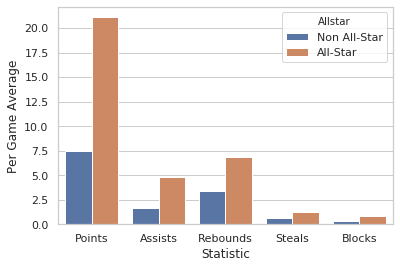

In [17]:
players4 = players3.groupby('Allstar').agg(np.mean).iloc[:,[2,3,22,5,6]].reset_index().rename(columns={'playPTS':'Points','playAST':'Assists','playTRB':'Rebounds','playSTL':'Steals','playBLK':'Blocks'})
players5 = players4.melt('Allstar').replace([1,0],['All-Star','Non All-Star']).rename(columns={'value':'Per Game Average','variable': 'Statistic'})
ax = sns.barplot(x="Statistic", y="Per Game Average", hue="Allstar", data=players5)

We can see that there is large discrepancy in the value of average statistics between All-stars and non-All-stars, with all-stars having between twice and three times as many of each category of counting statistic as an avergae player. Now we can look at the correlation between these different stats using a seaborn heatmap.

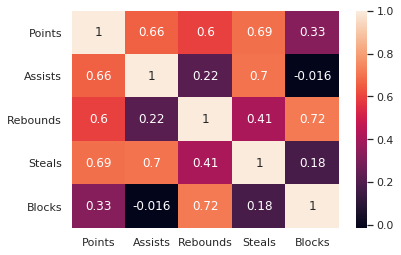

In [18]:
players6 = players3.iloc[:,[3,4,23,6,7]].rename(columns={'playPTS':'Points','playAST':'Assists','playTRB':'Rebounds','playSTL':'Steals','playBLK':'Blocks'})
sns.heatmap(players6.corr(),annot=True)

As we can see, points has a high correlation with all the other statistics, while the rest are fairly independent with the exception of assists and steals. Let us try seeing how we can implement these stats into our logistic regression model.

## Part 3: Logistic Regression

Since points alone seems to have a high correlation with the other stats, let us begin by first using only points to build our classifier and see how the results are. We must first split our data into a testing set and a set used for training and validation purposes. We can do this by implementing a sklearn test/train split twice.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
train, val = train_test_split(players3, test_size=0.15, random_state=42)

In [20]:
X_train = train.iloc[:,[3]]
Y_train = train['Allstar']
model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.9711209006363192


In [21]:
X_val = val.iloc[:,[3]]
Y_val = val['Allstar']
from sklearn.model_selection import cross_val_score
print("Validation Accuracy: ",np.mean(cross_val_score(model, X_val, Y_val,cv=5)))

Validation Accuracy:  0.9501141552511415


We can see that using points alone give us a really high accuracy of above 95% on both the training and validation sets. Let us now try incorporating our other counting statistics.

In [22]:
X_train = train.iloc[:,[3,4,23,6,7]]
Y_train = train['Allstar']
model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.9745472344591287


In [23]:
X_val = val.iloc[:,[3,4,23,6,7]]
Y_val = val['Allstar']
from sklearn.model_selection import cross_val_score
print("Validation Accuracy: ",np.mean(cross_val_score(model, X_val, Y_val,cv=5)))

Validation Accuracy:  0.9528919330289194


We can see that using all 5 major doesn't increase our accuracy by much, revealing that points per game is indeed the single biggest correlating factor with All-star selection. The fact that the 5 major stats alone give us such high accuracy shows how much these stats are taken into account during the fan, player and media voting process. But is this how it should be?

## Part 4: Further Exploration

Are the statistics that we used in our model in the previous section fair to the players? This section aims to address these questions.

### Section A: Per 36 Stats

The first step we can take is calculating the players per-36 stats. These are statistics that are adjusted for time, ie every player's statistical output is extrapolated to a playing time of 36 minutes to see what would have happened if a given player had played 36 minutes (3 quartes of basketball or 75% of an entire game). The first thing we need to address is dividing all players' statistics by their playing time.

In [24]:
players7 = players3.iloc[:,[0,1,2,3,4,23,6,7,24]].rename(columns={'playMin':'Minutes','playPTS':'Points','playAST':'Assists','playTRB':'Rebounds','playSTL':'Steals','playBLK':'Blocks'})
players7.head()

Name  Season  Minutes  Points  Assists  Rebounds  Steals  Blocks  \
0  A.J. Hammons       5     7.27    2.18     0.18      1.68    0.05    0.59   
1    A.J. Price       1    22.39    7.74     3.60      2.00    0.58    0.05   
2    A.J. Price       2     3.61    1.57     0.46      0.36    0.04    0.00   
3    A.J. Price       3    12.50    5.12     1.77      1.23    0.27    0.00   
4  Aaron Brooks       1    18.85    7.09     2.15      1.51    0.57    0.19   

   Allstar  
0        0  
1        0  
2        0  
3        0  
4        0

In [25]:
for i in players7.columns[3:8]:
    players7.loc[:,i] = players7.loc[:,i].div(players7['Minutes'],axis=0).apply(lambda x: x*36).round(2)
players7 = players7.fillna(0)
players7.head()

Name  Season  Minutes  Points  Assists  Rebounds  Steals  Blocks  \
0  A.J. Hammons       5     7.27   10.80     0.89      8.32    0.25    2.92   
1    A.J. Price       1    22.39   12.44     5.79      3.22    0.93    0.08   
2    A.J. Price       2     3.61   15.66     4.59      3.59    0.40    0.00   
3    A.J. Price       3    12.50   14.75     5.10      3.54    0.78    0.00   
4  Aaron Brooks       1    18.85   13.54     4.11      2.88    1.09    0.36   

   Allstar  
0        0  
1        0  
2        0  
3        0  
4        0

Let's now take a look at Kobe's per 36 numbers:

In [26]:
players7[players7['Name']=='Kobe Bryant']

Name  Season  Minutes  Points  Assists  Rebounds  Steals  Blocks  \
1683  Kobe Bryant       1    38.69   25.45     5.59      5.16    1.27    0.30   
1684  Kobe Bryant       2    29.50   16.88     7.72      5.28    1.43    0.21   
1685  Kobe Bryant       3    34.46   23.34     5.88      5.94    1.40    0.21   
1686  Kobe Bryant       4    28.20   22.46     3.56      4.77    1.20    0.26   

      Allstar  
1683        1  
1684        1  
1685        1  
1686        1

We can see that, his statistics increased for every season except 1. Now we can again examine the visualizations from part 2 to see how this impacts both categories of players.

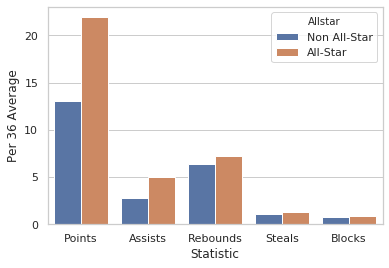

In [27]:
players8 = players7.groupby('Allstar').agg(np.mean).iloc[:,2:].reset_index().melt('Allstar').replace([1,0],['All-Star','Non All-Star']).rename(columns={'value':'Per 36 Average','variable': 'Statistic'})
ax = sns.barplot(x="Statistic", y="Per 36 Average", hue="Allstar", data=players8)

We can see that the discrepancies become much closer. We then proceed to test this model on our data.

In [28]:
train1, val1 = train_test_split(players7, test_size=0.15, random_state=42)

In [29]:
X_train = train1.iloc[:,3:8]
Y_train = train1['Allstar']
model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.9583945178658835


In [30]:
X_val = val1.iloc[:,3:8]
Y_val = val1['Allstar']
print("Validation Accuracy: ",np.mean(cross_val_score(model, X_val, Y_val,cv=5)))

Validation Accuracy:  0.939041095890411


We can see that our accuracies are still pretty high, but below using solely the unadjusted stats.

### Section B: Efficiency
Now let's take a look at efficiency

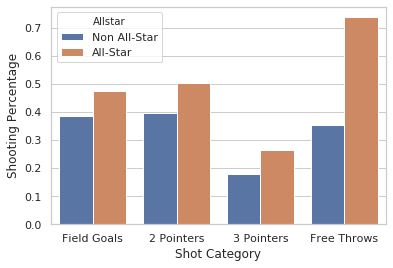

In [31]:
players9 = players3.iloc[:,[11,14,17,20,24]].groupby('Allstar').agg(np.mean).reset_index().rename(columns={'playFG%':'Field Goals','play2P%':'2 Pointers','play3P%':'3 Pointers','playFT%':'Free Throws'}).melt('Allstar').replace([1,0],['All-Star','Non All-Star']).rename(columns={'value':'Shooting Percentage','variable': 'Shot Category'})
ax = sns.barplot(x="Shot Category", y="Shooting Percentage", hue="Allstar", data=players9)

We can see that NBA All-Stars tend to have higher shot percentages in all categories (although again, the discrepancy is not as high as for base counting stats). Let us try running these alone in the Logistic regression model.

In [32]:
X_train = train.iloc[:,[11,14,17,20]]
Y_train = train['Allstar']
model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.951052373959863


In [33]:
X_val = val.iloc[:,[11,14,17,20]]
Y_val = val['Allstar']
print("Validation Accuracy: ",np.mean(cross_val_score(model, X_val, Y_val,cv=5)))

Validation Accuracy:  0.9363013698630136


Again, it is high, but not as high as using just the basic stats. Let's take a look at how the shooting percentages correlate with the big five stats using another heatmap

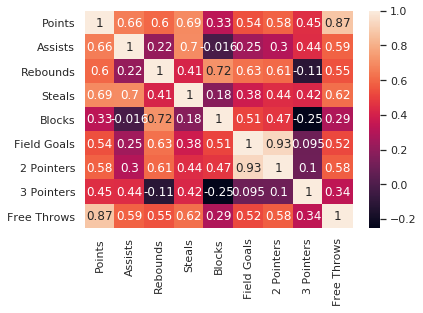

In [34]:
players10 = players3.iloc[:,[3,4,23,6,7,11,14,17,20]].rename(columns={'playFG%':'Field Goals','play2P%':'2 Pointers','play3P%':'3 Pointers','playFT%':'Free Throws','playPTS':'Points','playAST':'Assists','playTRB':'Rebounds','playSTL':'Steals','playBLK':'Blocks'})
sns.heatmap(players10.corr(),annot=True)

We can see that 3 pointers have the lowest correlation with the other statistics.

## Part 5: Final Model

Let us try incorporating just 3 pointers to our model

In [35]:
X_train = train.iloc[:,[3,4,23,6,7,17]]
Y_train = train['Allstar']
model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.9745472344591287


In [36]:
X_val = val.iloc[:,[3,4,23,6,7,17]]
Y_val = val['Allstar']
print("Validation Accuracy: ",np.mean(cross_val_score(model, X_val, Y_val,cv=5)))

Validation Accuracy:  0.9528919330289194


We can see that it  just about maintained the training and validation accuracies. Let us try adding free throw shooting next since it had the biggest difference between all-stars and non all-stars.

In [37]:
X_train = train.iloc[:,[3,4,23,6,7,20]]
Y_train = train['Allstar']
model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.9745472344591287


In [38]:
X_val = val.iloc[:,[3,4,23,6,7,20]]
Y_val = val['Allstar']
print("Validation Accuracy: ",np.mean(cross_val_score(model, X_val, Y_val,cv=5)))

Validation Accuracy:  0.9528919330289194


The free throws lowered the training accuracy slightly, and keep the validation set at around the same accuracy. We can play around with our data some more to see if we can find an ideal combination between the 9 factors - I found that in fact using all 9 produces the best trade off between accuracies in the training and validation sets.

In [39]:
X_train = train.iloc[:,[3,4,23,6,7,11,14,17,20]]
Y_train = train['Allstar']
model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.9745472344591287


In [40]:
X_val = val.iloc[:,[3,4,23,6,7,11,14,17,20]]
Y_val = val['Allstar']
print("Validation Accuracy: ",np.mean(cross_val_score(model, X_val, Y_val,cv=5)))

Validation Accuracy:  0.9556316590563168


 Finally let us then run our original model on our test set.

In [41]:
X_test = test.iloc[:,[3,4,23,6,7,11,14,17,20]]
Y_test = test['Allstar']
from sklearn.model_selection import cross_val_score
print("Test Accuracy: ",np.mean(cross_val_score(model, X_val, Y_val,cv=5)))

Test Accuracy:  0.9556316590563168


We achieve a final accuracy of 95.5% - not bad at all!